In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def read_all_images(file_names):
    result = []
    for i in file_names:
        image = plt.imread(os.getcwd() + '/' + i)
        final_image = cv2.resize(image,(80,60))
        result.append(final_image)
    return result

In [3]:
os.chdir("/Users/parth/Downloads/golden")
images_golden = os.listdir()
golden_list = read_all_images(images_golden)
print(f"Length of Golden balloons {len(images_golden)} {len(golden_list)}")

os.chdir("/Users/parth/Downloads/red")
images_red = os.listdir()
red_list = read_all_images(images_red)
print(f"Length of Red balloons {len(images_red)} {len(red_list)}")

Length of Golden balloons 95 95
Length of Red balloons 85 85


In [4]:
golden_label = [0] * len(golden_list)
red_label = [1] * len(red_list)
Y = np.hstack([np.array(golden_label), np.array(red_label)])
Y.shape

(180,)

In [5]:
X = np.vstack([np.array(golden_list),np.array(red_list)])

In [6]:
X.shape

(180, 60, 80, 3)

(60, 80, 3)


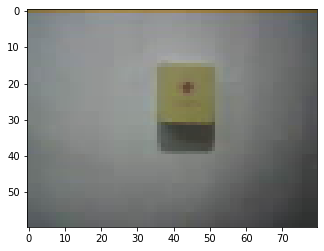

In [22]:
plt.imshow(X[99])
print(X[1].shape)

In [23]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.1, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3]))
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3]))
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(162, 60, 80, 3) (162,)
(18, 60, 80, 3) (18,)
(162, 14400) (162,)
(18, 14400) (18,)


In [11]:
classifier = RandomForestClassifier(n_estimators = 10,max_depth=2, random_state=0)

In [12]:
classifier.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=0)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
accuracy_score(Y_test,y_pred)

1.0

In [18]:
print(y_pred)

[0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1]


In [19]:
print(Y_test)

[0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1]


In [20]:
from micromlgen import port

In [21]:
c_code = port(classifier)
print(c_code)

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[2] = { 0 };
                        // tree #1
                        if (x[8287] <= 59.0) {
                            votes[0] += 1;
                        }

                        else {
                            if (x[9326] <= 64.5) {
                                votes[0] += 1;
                            }

                            else {
                                votes[1] += 1;
                            }
                        }

                        // tree #2
                        if (x[8290] <= 53.0) {
                            votes[0] += 1;
                        }

                        else {
               